# DATASET LOADING

**PROPHET IS AN OPEN SOURCE MODEL BY FACEBOOK**

In [1]:
import pandas as pd
from prophet import Prophet
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/kaggle/input/melbourne-temperature-dataset/Melbourne_temp_data.csv')

In [3]:
df.head()

,Date,"Daily minimum temperatures in Melbourne, Australia, 1981-1990"
0,1/1/1981,20.7
1,1/2/1981,17.9
2,1/3/1981,18.8
3,1/4/1981,14.6
4,1/5/1981,15.8


# DATA PREPROCESSING

In [4]:
df.shape

(3650, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column                                                         Non-Null Count  Dtype 
---  ------                                                         --------------  ----- 
 0   Date                                                           3650 non-null   object
 1   Daily minimum temperatures in Melbourne, Australia, 1981-1990  3650 non-null   object
dtypes: object(2)
memory usage: 57.2+ KB


In [6]:
df.isnull().sum()

Date                                                             0
Daily minimum temperatures in Melbourne, Australia, 1981-1990    0
dtype: int64

In [7]:
df['Date']  = pd.to_datetime(df['Date'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column                                                         Non-Null Count  Dtype         
---  ------                                                         --------------  -----         
 0   Date                                                           3650 non-null   datetime64[ns]
 1   Daily minimum temperatures in Melbourne, Australia, 1981-1990  3650 non-null   object        
dtypes: datetime64[ns](1), object(1)
memory usage: 57.2+ KB


In [9]:
df[df['Daily minimum temperatures in Melbourne, Australia, 1981-1990'] == '?0.2']

,Date,"Daily minimum temperatures in Melbourne, Australia, 1981-1990"
565,1982-07-20,?0.2


**WE HAVE TO REMOVE THIS "?" WE ONLY WANT NUMERICAL ENTRIES**

In [10]:
df['Daily minimum temperatures in Melbourne, Australia, 1981-1990'] = df['Daily minimum temperatures in Melbourne, Australia, 1981-1990'].str.replace(r'[^0-9\.\-]', '', regex = True)

In [11]:
df['Daily minimum temperatures in Melbourne, Australia, 1981-1990'] = df['Daily minimum temperatures in Melbourne, Australia, 1981-1990'].astype('float')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column                                                         Non-Null Count  Dtype         
---  ------                                                         --------------  -----         
 0   Date                                                           3650 non-null   datetime64[ns]
 1   Daily minimum temperatures in Melbourne, Australia, 1981-1990  3650 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 57.2 KB


**HERE WE DONT NEED TO CHANGE INDEX TO DATE BEACUSE PROPHET CAN WORK WITHOUT THIS**

In [13]:
df.head()

,Date,"Daily minimum temperatures in Melbourne, Australia, 1981-1990"
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


Prophet expects the data in this specific format:

* ds: Column for the date/time values
* y: Column for the values you want to forecast

In [14]:
df.rename(columns = {'Date':'ds',
         'Daily minimum temperatures in Melbourne, Australia, 1981-1990': 'y'},
           inplace = True)

In [15]:
df.head()

,ds,y
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


# MODEL TRAINING

In [16]:
!pip install pystan fbprophet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 59.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.9/47.9 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 MB 32.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 54.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 54.5 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for fbprophet
  Running setup.py clean for fbprophet
  Created wheel for pymeeus: filename=PyMeeus-0.5.12

In [17]:
pip install prophet

Note: you may need to restart the kernel to use updated packages.


In [18]:
model = Prophet()

In [19]:
model.fit(df)

11:00:26 - cmdstanpy - INFO - Chain [1] start processing
11:00:26 - cmdstanpy - INFO - Chain [1] done processing


# FORECASTING

In [20]:
future = model.make_future_dataframe(periods = 10, freq = 'D') # IT MEANS PREDICTION FOR 10 DAYS, M MEANS MONTHS AND Y MEANS YEARS

In [21]:
forecast = model.predict(future)

In [22]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1981-01-01,11.845441,11.726222,18.458051,11.845441,11.845441,3.328357,3.328357,3.328357,0.010971,0.010971,0.010971,3.317386,3.317386,3.317386,0.0,0.0,0.0,15.173798
1,1981-01-02,11.843590,11.701506,18.423443,11.843590,11.843590,3.375348,3.375348,3.375348,-0.019836,-0.019836,-0.019836,3.395184,3.395184,3.395184,0.0,0.0,0.0,15.218939
2,1981-01-03,11.841740,11.757631,18.671402,11.841740,11.841740,3.412345,3.412345,3.412345,-0.060155,-0.060155,-0.060155,3.472501,3.472501,3.472501,0.0,0.0,0.0,15.254085
3,1981-01-04,11.839889,11.678149,18.766297,11.839889,11.839889,3.394984,3.394984,3.394984,-0.153103,-0.153103,-0.153103,3.548087,3.548087,3.548087,0.0,0.0,0.0,15.234873
4,1981-01-05,11.838038,11.851615,18.832206,11.838038,11.838038,3.600999,3.600999,3.600999,-0.019721,-0.019721,-0.019721,3.620720,3.620720,3.620720,0.0,0.0,0.0,15.439037


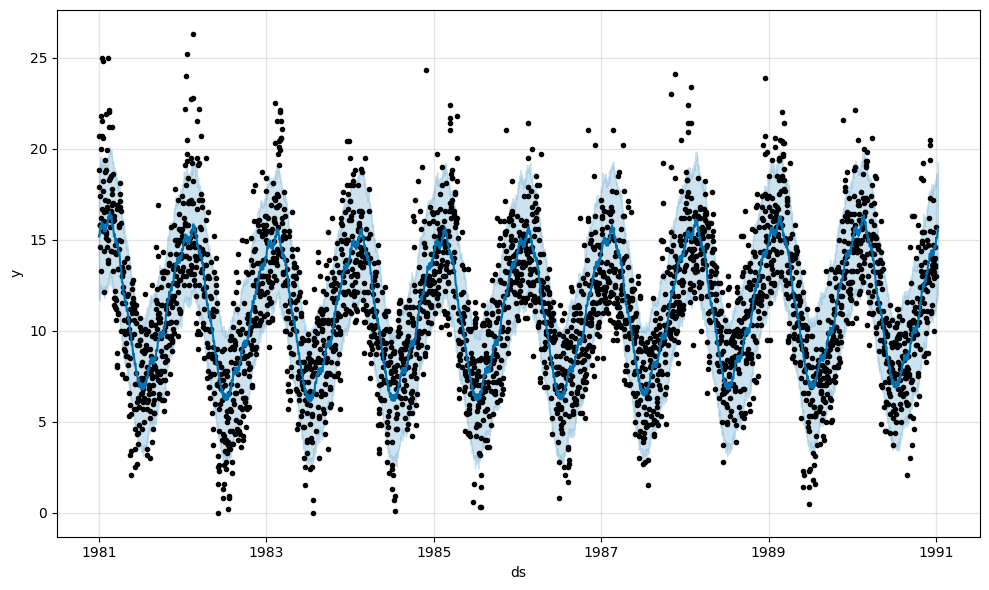

In [23]:
fig = model.plot(forecast)

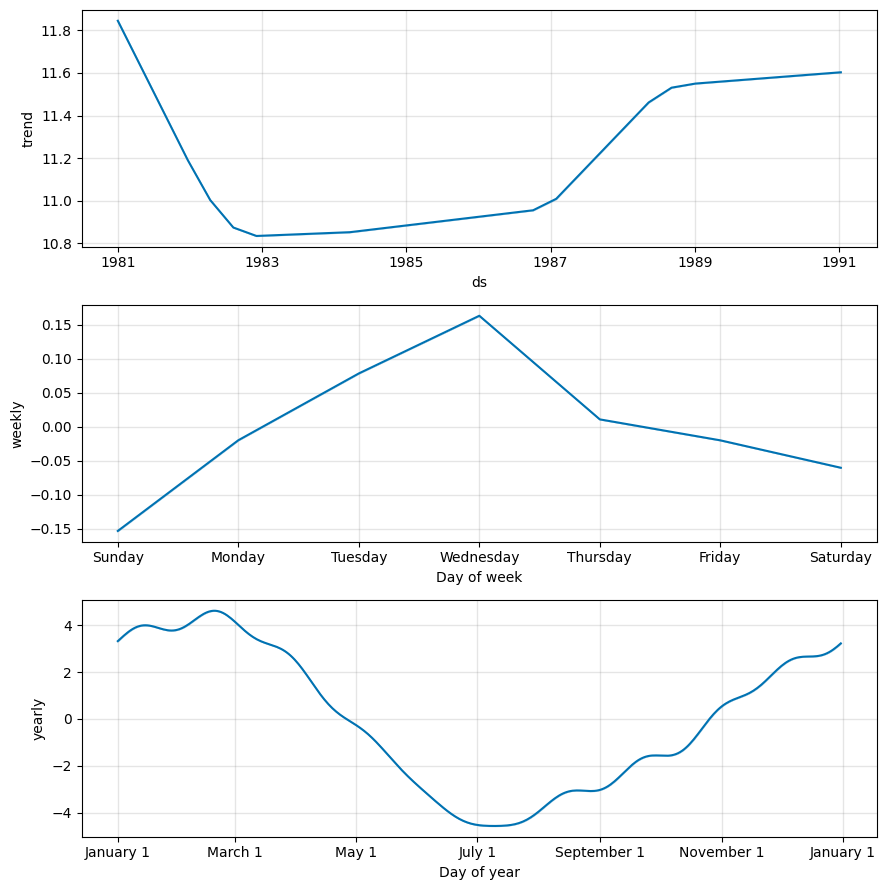

In [24]:
comp = model.plot_components(forecast)